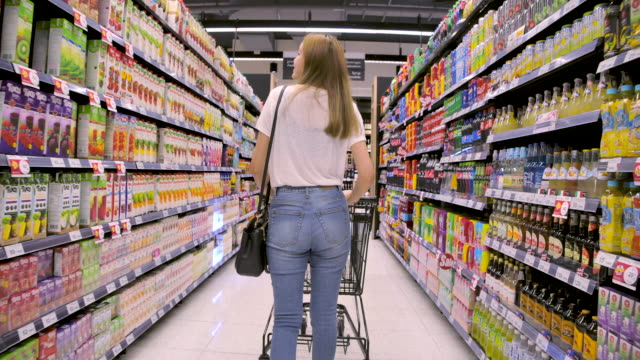

## What is market basket analysis?

Market basket analysis is the study of items that are purchased or grouped in a single transaction or
multiple, sequential transactions. Understanding the relationships and the strength of those relationships 
is valuable information that can be used to make recommendations, cross-sell, up-sell, offer coupons, 
etc.
Market Basket Analysis is one of the key techniques used by large retailers to uncover associations 
between items. It works by looking for combinations of items that occur together frequently in 
transactions. To put it another way, it allows retailers to identify relationships between the items that 
people buy.

##  What is Association Analysis?

Association analysis uses a set of transactions to discover rules that indicate the likely occurrence of an 
item based on the occurrences of other items in the transaction.

The technique of association rules is widely used for retail basket analysis. It can also be used for 
classification by using rules with class labels on the right-hand side. It is even used for outlier detection 
with rules indicating infrequent/abnormal association.
Association analysis also helps us to identify cross-selling opportunities.

##### **Support**:   It Indicates how frequently an item or item-set appears in the data-set.
$$ Support =  \frac{frq(X,Y)}{N}$$

Support is an Important measure becouse a rule that has very low support may occur simple by chance. Moreover a low support rule is also less interestinf for business prespectibe also because it may not br profitable to promote items which customers seldom buy together.

##### Confidence:  It indicates how often a rule is found to be true.
$$ Confidence =  \frac{frq(X,Y)}{frq (X)}$$

confidence measures the reliability of the inference made by rule. For a rule {A}--->{B} with high confidence indicates that B is more likely to occur with A


##### Lift (X--->Y) : Indicates the rise in probability of occurrence of Y when X has already occurred
$$ Lift =  \frac{Support}{Supp (X) *Supp (Y)  }$$

we calculate lift to know, how the antecedent and consequent are related to one another.

##### For a rule: {Antecedent} {Consequent}

. If lift = 1, then it means that the possibility of occurrence of Antecedent and Consequent are not dependent on one another.

. If lift < 1, then it means the occurrence of Antecedent has negative effect on occurrence on Consequent and vice versa.

. If lift > 1, then it means that the two occurrences are dependent on one another, and these rules are very useful in determining the consequent in latter cases.   It also lets us know to what extent the occurrences are dependent on one another.

##### Leverage: 
Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells.

##### Conviction: 
The ratio of expected support of X occurring without Y assuming X and \neg Y are independent, to the observed support of X occuring without Y . If conviction is greater than 1, then this metric shows that incorrect predictions ( X \Rightarrow Y ) occur less often than if these two actions were independent.

### Problem Statement 
 . Identify patterns in consumer decision-making with the mlxtend package.
 
 . Use metrics to evaluate the properties of patterns.
 
 . Construct "rules" that provide concrete recommendations for businesses.

# Dataset Info: 
###### Data Is: 
Brazilian E-Commerce Public Dataset by Olist.

###### Order Items Dataset: olist_order_items_dataset.csv
This dataset includes data about the items purchased within each order.

###### Products Dataset: olist_products_dataset.csv
This dataset includes data about the products sold by Olist.

###### Transaction Dataset:olist_transactions.csv
This dataset include data about the transaction by customer on Olist.

##### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend

#### Importing data 

In [2]:
orders = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translations = pd.read_csv('product_category_name_translation.csv')

In [3]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9


#### Columns Name Info :
1) order_id: The unique identifier for a transaction.

2) order_item_id: The order of an item within a transaction.

3) product_id: The unique identifier for a product

4) price: The product's price.

In [4]:
# Print orders info.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [5]:
# Print products header.
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


#### Columns Name Info: 
1) product_id: The unique identifier for a product.

2) product_category_name: The name of an item's product category in Portuguese.

3) product_weight_g: The product's weight in grams.

4) product_length_cm: The product's length in centimeters.

5) product_width_cm: The product's width in centimeters.

6) product_height_cm: The product's height in centimeters.

In [6]:
# Print products header.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [7]:
# Print translations header.
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Columns Name Info :
1) product_category_name : The name of an item's product category in Portuguese.

2) product_category_name_english : The name of an item's product category in English.

In [8]:
# Print translations info.
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Translating item category names

Brazilian Use Portuguese language, for our better understanding we need to convert it into English 

In [9]:
# Translate product names to English.
products = products.merge(translations, on='product_category_name', how="left")

# Print English names.
products['product_category_name_english']

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

### Converting Product Name (Portu - Eng) 

In [10]:
# Define product category name in orders DataFrame.
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

In [11]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


In [12]:
# Droping NaN value
orders.dropna(inplace=True,subset=['product_category_name_english'])

In [13]:
# To Get Total Number of Unique Item in dataset
print('Unique Item in Dataset are : ' , len(orders['product_id'].unique()))

Unique Item in Dataset are :  32328


In [14]:
# Print Total number of unique categories.
print('Total number of unique categories :', len(orders['product_category_name_english'].unique()))

Total number of unique categories : 71



### Extraction Of Transactions Details 

In [15]:
#  transaction itemsets from orders Dataframe.
transactions = orders.groupby("order_id").product_category_name_english.unique()

# Print transactions header.
transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75            [perfume]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

In [16]:
print('Total number of transactions : ', transactions.shape)

Total number of transactions :  (97256,)


In [17]:
# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]
print(' Print Min and Max number of transaction:')
print('Minimum:',np.min(counts), 'Maximum :', np.max(counts))

 Print Min and Max number of transaction:
Minimum: 1 Maximum : 3


<AxesSubplot:>

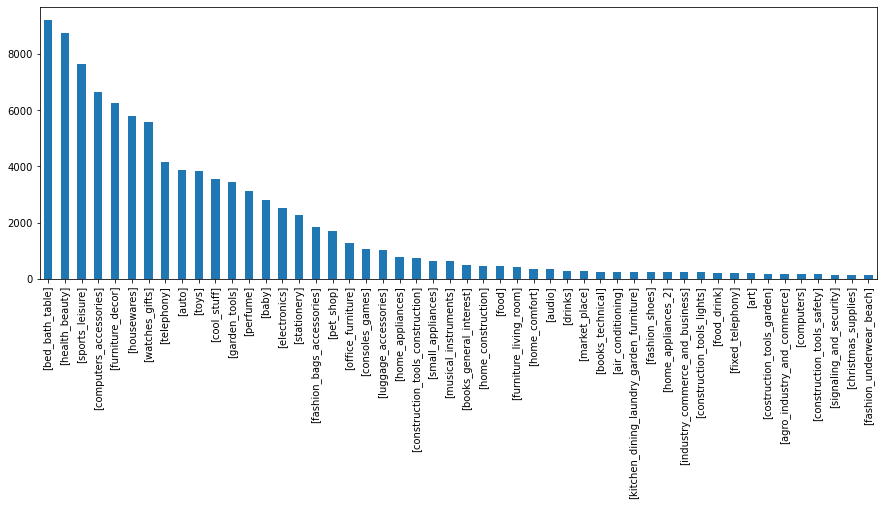

In [18]:
# Plot 50 largest categories of transactions.
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))

Category Name bed_bath_table and health_beauty have more than 8000 Translation

### Preprocessing And Model Building 

In [19]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [20]:
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_crafts,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_crafts               0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64

In [22]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

1    96530
2      711
3       15
dtype: int64

Only 711+15=726 transaction have more than 2 item category

### Aggregate the dataset further by combining product sub-categories¶


#### In above we use And logic gate opration but from now we will use OR logic gate opration 

In [23]:
# Add sports_leisure and health_beauty to DataFrame.
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

# Print support value.
onehot['sports_leisure_health_beauty'].mean(axis = 0)

0.00014394998766142962

Only 0.014% of transactions contain a product from both the sports and leisure,

In [24]:
# Merge books_imported and books_technical.
onehot['books'] = onehot['books_imported'] | onehot['books_technical']

# Print support values for books, books_imported, and books_technical.
onehot['books'].mean(axis=0)

0.003218310438430534

### Compute the confidence metric

In [25]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['sports_leisure'] & onehot['health_beauty']).mean()

# Print confidence metric for sports_leisure -> health_beauty.
joint_support / onehot['health_beauty'].mean()

0.0015844273426889996

In [26]:
# Print confidence for health_beauty -> sports_leisur
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

*Insight:* $confidence(sports\_leisure \rightarrow health\_beauty)$ was higher than $confidence(health\_beauty \rightarrow sports\_leisure)$. Since the two have the same joint support, the confidence measures will differ only by the antecedent support. The higher confidence metric means that the antecedent has lower support.

## Applying the Algorithm  Algorithm

The Apriori Algorithm is an influential algorithm for mining frequent intemsets for boolean associaton rule 

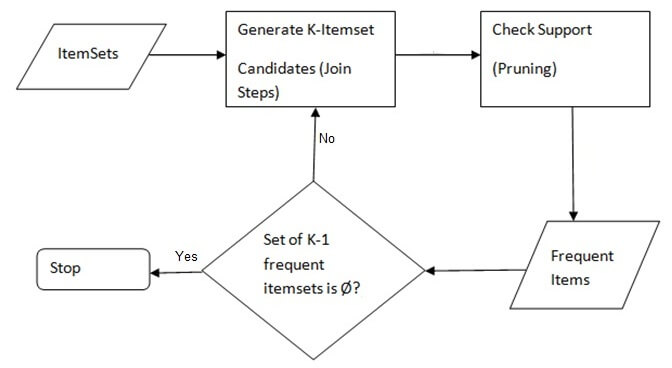

In [27]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.040070,(5)
1,0.029664,(6)
2,0.096827,(7)
3,0.068777,(15)
4,0.010920,(16)
5,0.037345,(20)
6,0.026219,(27)
7,0.019166,(28)
8,0.066310,(40)
9,0.036173,(43)


Observation 1: apriori returns a DataFrame with a support column and an itemsets column.

Observation 2: By default apriori returns itemset numbers, rather than labels. We can change this by using the use_colnames parameter.

### Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)
frequent_itemsets

In [28]:
# Apply apriori algorithm to data with min support threshold of 0.00005.
frequent_itemsets = apriori(onehot, min_support = 0.00005, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.000236,(arts_and_crafts)
4,0.003599,(audio)
...,...,...
108,0.000051,"(stationery, luggage_accessories)"
109,0.000051,"(watches_gifts, sports_leisure)"
110,0.000144,"(sports_leisure_health_beauty, sports_leisure)"
111,0.000062,"(stationery, toys)"


The Apriori algorithm reduced the to 113

In [29]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)

In [30]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, metric = 'support' ,min_threshold = 0.0001)

# Print rules header.
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,(health_beauty),(sports_leisure_health_beauty),0.090853,0.000144,0.000144,0.001584,11.006790,0.000131,1.001443
38,(sports_leisure),(housewares),0.079378,0.060500,0.000113,0.001425,0.023552,-0.004689,0.940840
39,(housewares),(sports_leisure),0.060500,0.079378,0.000113,0.001869,0.023552,-0.004689,0.922346
40,(sports_leisure_health_beauty),(sports_leisure),0.000144,0.079378,0.000144,1.000000,12.597927,0.000133,inf
41,(sports_leisure),(sports_leisure_health_beauty),0.079378,0.000144,0.000144,0.001813,12.597927,0.000133,1.001673


In [31]:
rules.shape

(42, 9)

In [32]:
# Recover association rules using confidence threshold of 0.01.min_threshold = 0.01
rules = association_rules(frequent_itemsets, metric = 'confidence',min_threshold = 0.01)

# Print rules.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(art),(furniture_decor),0.002077,0.066310,0.000051,0.024752,0.373287,-0.000086,0.957388
1,(audio),(watches_gifts),0.003599,0.057827,0.000062,0.017143,0.296452,-0.000146,0.958606
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881
4,(books_imported),(books),0.000545,0.003218,0.000545,1.000000,310.722045,0.000543,inf


In [33]:
rules.shape

(15, 9)

In [34]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881


In [35]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881


#### Result:  Best Rule For  Cross Promotional Purpose Will Be {home_comfort}--->{bed_bath_table}

<AxesSubplot:xlabel='leverage', ylabel='confidence'>

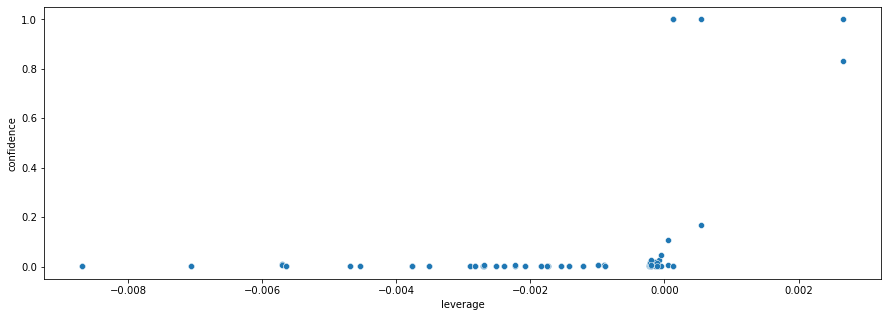

In [37]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)